In [120]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import utils

import importlib
importlib.reload(utils)

<module 'utils' from '/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py'>

# Read Data

In [121]:
in_dir = '536a40a6-data-2018-01-23-small-single-evidence-new-format'

raw_data = pd.read_csv('./data/' + in_dir + '/info.csv')

data,fails = utils.parse_data(raw_data)

In [122]:
data = data[data['net'] > 3]

In [123]:
len(data)

24

# Analyze Evidence

In [124]:
last_perfs = []
last_pops = []
pops = []
evidences = []
net_evidences = []
final_pops = []

num_turns = max(data['turn']) -1

for net in sorted(set(data['net'])):
    
    net_evidence = utils.get_evidence(fails[net])

    
    print('Net', net)
    print(net_evidence[1][:(num_turns-1)])
    print(np.array(net_evidence[num_turns][:(num_turns-1)] * 100,dtype=int)/100.0)
    
    for t in range(num_turns+1):

        if t > 1:
            last_perfs += list(net_evidence[num_turns][t-2])
            last_pops += list(mean_pop)
        
        if t > 0:    
            mean_pop = utils.get_pop(data,net,t)
            print(mean_pop)
            
        if t > 1:
            pops += list(mean_pop)

    for window in range(1,num_turns):
        print('Final correlation with last',window,'evidence', np.corrcoef(net_evidence[window][t-2],mean_pop)[0,1])

    evidences += list(net_evidence[1][t-2])
    net_evidences += list(net_evidence[num_turns][t-2])
    final_pops += list(mean_pop)


Net 4
[[ 0.5   0.5   0.25  0.75  0.25  1.    0.    0.75]
 [ 0.5   0.5   0.75  0.75  0.5   0.25  0.25  0.75]]
[[ 0.5   0.5   0.25  0.75  0.25  1.    0.    0.75]
 [ 0.5   0.5   0.5   0.75  0.37  0.62  0.12  0.75]]
[ 0.  0.  1.  0.  0.  1.  0.  1.]
[ 0.  0.  1.  0.  0.  1.  0.  1.]
[ 1.  1.  1.  1.  1.  0.  1.  1.]
Final correlation with last 1 evidence 0.544704779402
Final correlation with last 2 evidence -0.215308188172
Net 5
[[ 0.75  0.5   0.25  0.25  0.5   0.75  0.5   0.75]
 [ 0.25  0.25  0.75  0.25  0.5   1.    0.5   1.  ]]
[[ 0.75  0.5   0.25  0.25  0.5   0.75  0.5   0.75]
 [ 0.5   0.37  0.5   0.25  0.5   0.87  0.5   0.87]]
[ 0.  1.  0.  0.  1.  0.  1.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.  1.  1.  0.  1.  1.  1.  1.]
Final correlation with last 1 evidence 0.601929265429
Final correlation with last 2 evidence 0.480079358519
Net 6
[[ 0.5   0.75  0.25  0.25  0.5   0.75  0.75  0.5 ]
 [ 0.75  0.25  0.5   0.25  0.25  0.5   0.5   0.25]]
[[ 0.5   0.75  0.25  0.25  0.5   0.75  0.75  0

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:84: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)
/home/appreciate/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/appreciate/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


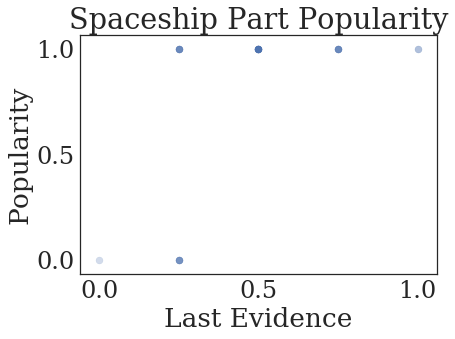

In [125]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(evidences,final_pops,s=50,alpha=0.25)
plt.xlabel('Last Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

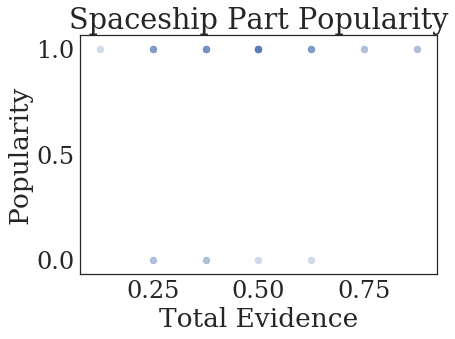

In [126]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(net_evidences,final_pops,s=50,alpha=0.25)
plt.xlabel('Total Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

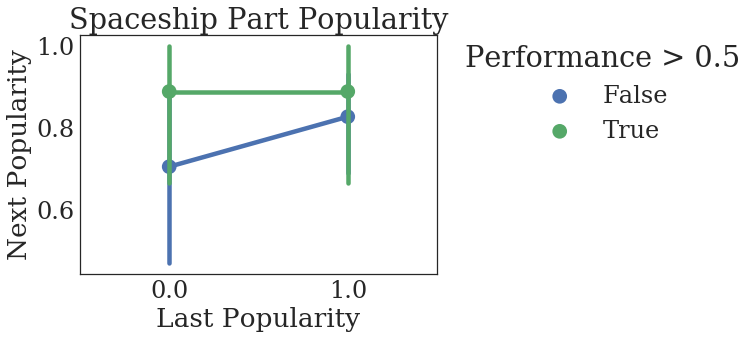

In [127]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot(last_pops,pops,np.array(last_perfs) > 0.5)
plt.xlabel('Last Popularity')
plt.ylabel('Next Popularity')
plt.title('Spaceship Part Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Performance > 0.5')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [128]:
np.array(pops)[np.array(last_pops) == 0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.])

# Analyze Reward

In [129]:
rewards = []

for net in sorted(set(data['net'])):
    
    rewards += [[]]
    for t in range(num_turns+1):

        if t > 0:
            rewards[-1] += [utils.get_reward(data,fails,net,t)]

rewards = np.transpose(np.array(rewards))

[ 0.  0.  1.  0.  0.  1.  0.  1.] [ 0.  0. -2.  2. -2.  4. -4.  2.]
[ 0.  0.  1.  0.  0.  1.  0.  1.] [ 0.  0. -2.  2. -2.  4. -4.  2.] [ 0.  0.  2.  2.  0. -2. -2.  2.]
[ 1.  1.  1.  1.  1.  0.  1.  1.] [ 0.  0.  2.  2.  0. -2. -2.  2.] [ 0.  0.  0.  0. -2. -2.  4. -2.]
[ 0.  1.  0.  0.  1.  0.  1.  0.] [ 2.  0. -2. -2.  0.  2.  0.  2.]
[ 1.  1.  1.  1.  1.  1.  1.  1.] [ 2.  0. -2. -2.  0.  2.  0.  2.] [-2. -2.  2. -2.  0.  4.  0.  4.]
[ 0.  1.  1.  0.  1.  1.  1.  1.] [-2. -2.  2. -2.  0.  4.  0.  4.] [ 0. -2.  2.  0. -4.  4.  0. -2.]
[ 1.  0.  0.  1.  0.  0.  0.  1.] [ 0.  2. -2. -2.  0.  2.  2.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.] [ 0.  2. -2. -2.  0.  2.  2.  0.] [ 2. -2.  0. -2. -2.  0.  0. -2.]
[ 1.  1.  1.  1.  1.  1.  1.  1.] [ 2. -2.  0. -2. -2.  0.  0. -2.] [ 2.  0. -2.  2. -2. -4.  0.  0.]
[ 0.  0.  0.  1.  0.  1.  1.  0.] [ 0.  0.  0. -4. -4. -4.  0.  0.]
[ 0.  1.  1.  1.  1.  1.  1.  1.] [ 0.  0.  0. -4. -4. -4.  0.  0.] [ 2.  0. -4.  0.  0.  0. -2. -2.]
[ 1.  1.  0.  

In [130]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: -0.1875
Turn 2: -0.25
Turn 3: -0.3125


In [131]:

turn = []
seen = []
perf = []
choice = []

for i,row in data.iterrows():
    
    if len(row['viewed']) > 0:
        
        print('----')
        print(row['net'],row['turn'])
        print(row['viewed'])
        print(fails[row['net']][row['turn']-2])
        print(row['action'])
        
        for j in range(len(row['action'])):
            
            these_successes = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'success')
            these_fails = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'fail')
            
            turn += [row['turn']]
            seen += [row['viewed'][j][0] != '0']
            perf += [these_successes - these_fails]
            choice += [row['action'][j]]
            
indiv_choices = pd.DataFrame({'turn':turn,'seen':seen,'perf':perf,'choice':choice})

----
6 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['fail', 'fail', 'success', 'fail'], ['success', 'success', 'success', 'fail'], ['success', 'fail', 'success', 'success'], ['fail', 'fail', 'success', 'fail'], ['success', 'success', 'fail', 'success'], ['fail', 'fail', 'success', 'success'], ['success', 'fail', 'fail', 'success'], ['fail', 'fail', 'fail', 'success']]
[1, 0, 0, 1, 0, 0, 0, 1]
----
5 1
[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']]
[['fail', 'fail', 'success', 'fail'], ['success', 'success', 'success', 'fail'], ['success', 'fail', 'success', 'success'], ['fail', 'fail', 'success', 'success'], ['fail', 'fail', 'fail', 'success'], ['success', 'success', 'fail', 'success'], ['fail', 'success', 'success', 'success'], ['fail', 'fail', 'fail', 'success']]
[0, 1, 0, 0, 1, 0, 1, 0]
----
6 2
[['success'], ['0'], ['0'], ['fail'], ['0'], ['0'], ['0'], ['fail']]
[['success', 'success', 'fail', 'fail'], ['success', 'fail', 'success', 'success'], ['fail', 's

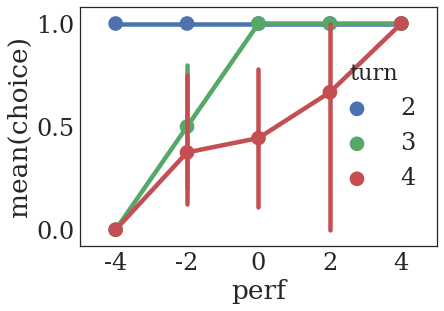

In [132]:
sns.pointplot('perf', 'choice', 'turn', data = indiv_choices[seen])

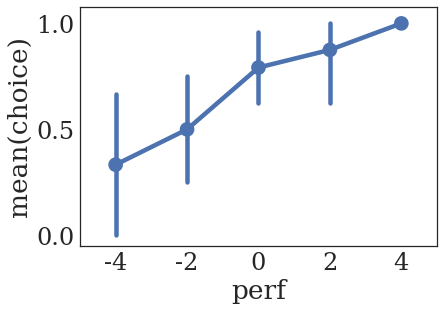

In [133]:
sns.pointplot('perf', 'choice', data = indiv_choices[seen])

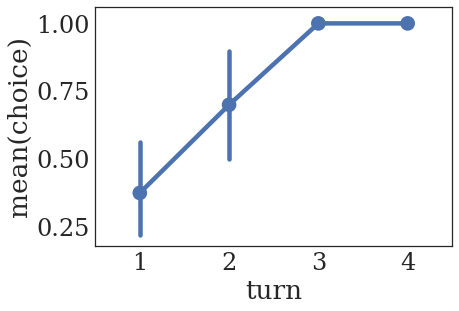

In [134]:
sns.pointplot('turn', 'choice', data = indiv_choices[~np.array(seen)])

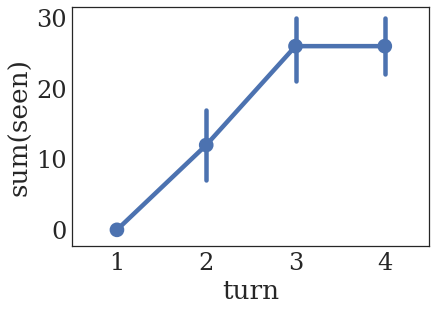

In [135]:
sns.pointplot('turn', 'seen', data = indiv_choices, estimator = sum)